In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from utils import Denoiser
from scipy.stats import zscore


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

keys = ['采集时间', '水温', 'pH', '溶解氧', '电导率', '浊度', '高锰酸盐指数','氨氮', '总磷', '总氮']
ks = ['date', 'water temperature', 'PH' ,'dissolved oxygen', 'Conductivity','Turbidity','PermanganateIndex',
        'Ammonia nitrogen','total phosphorus','total nitrogen', 'humidity','room temperature','chlorophyll','Algae density']

In [31]:
df = pd.read_csv('./data3.csv', index_col=0)
print(df.max().values)
print(df.min().values)

# values = values[~np.isnan(values).any(axis=1)]
# print(values.shape)
# df = pd.DataFrame(values)
# df.head(10)


[20.04072773  8.49852272  9.24190783]
[11.5777845   7.58387467  6.045     ]


水温
[12.07085204 12.08162531 12.08321679 ... 19.75339335 19.77132143
 19.779     ]


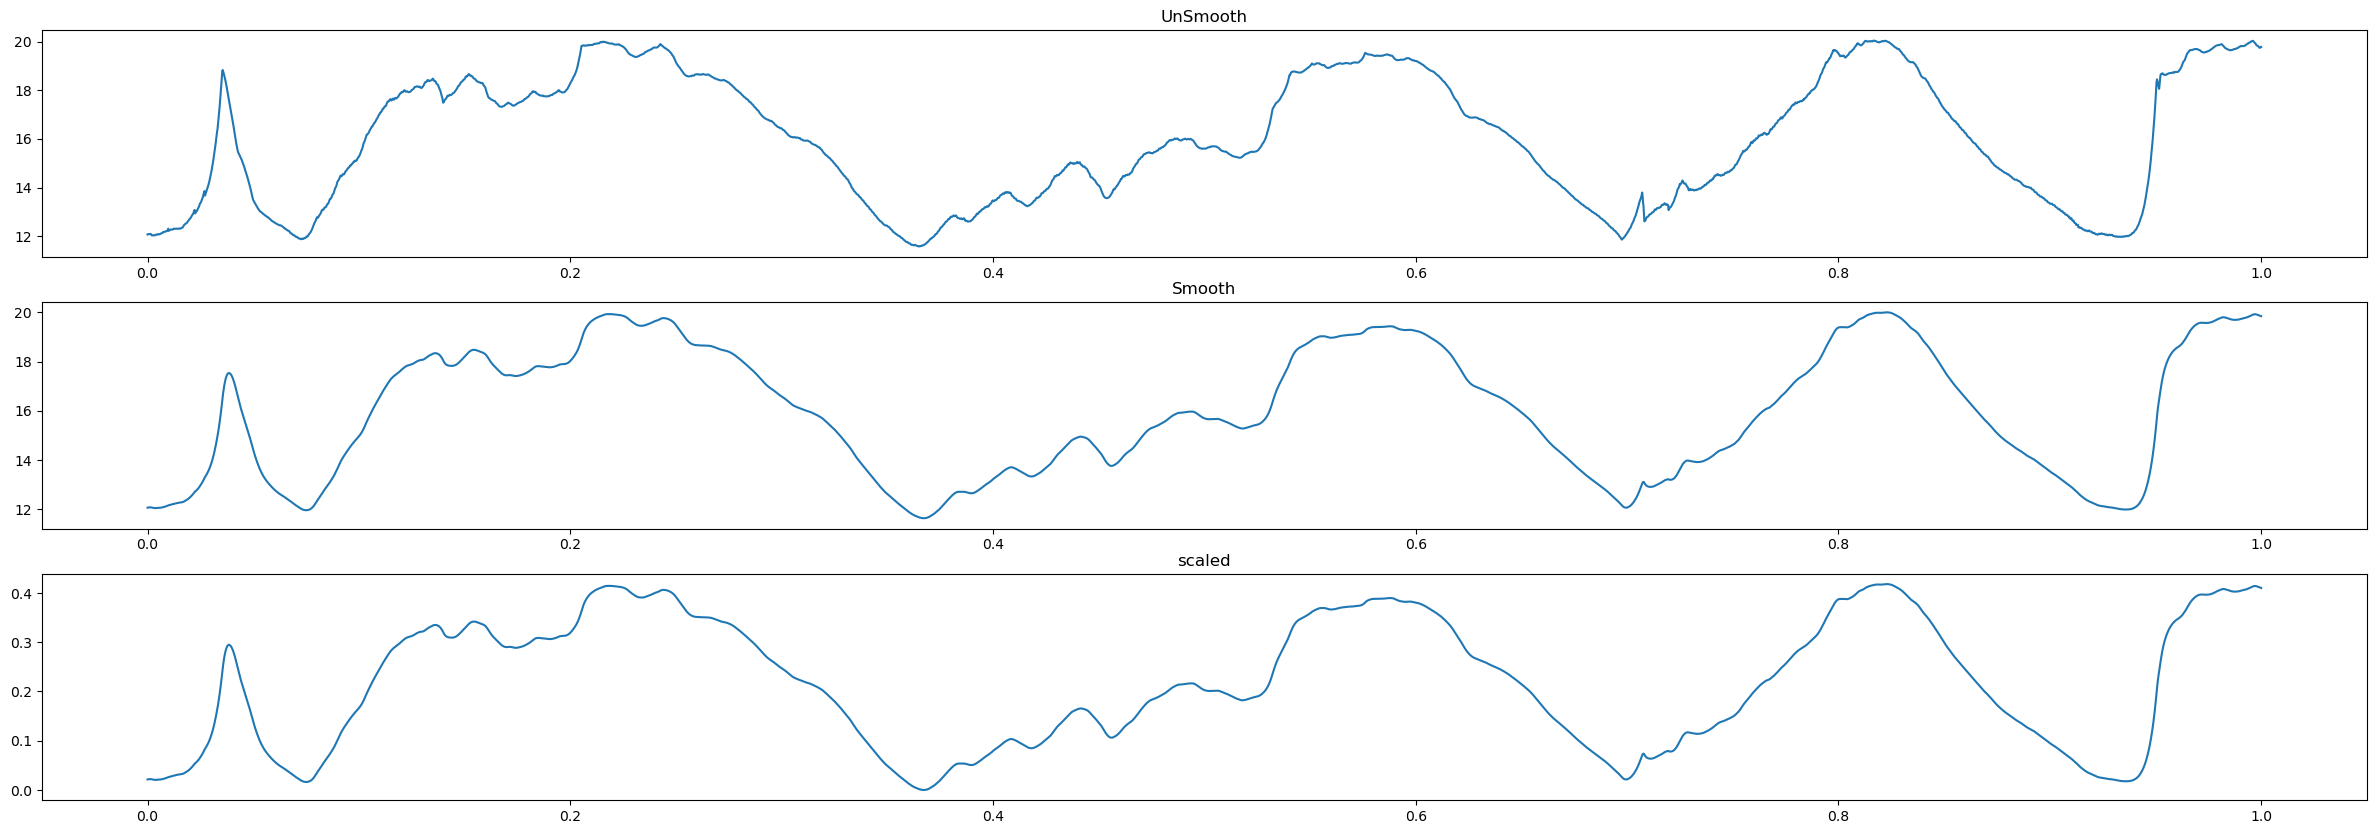

In [28]:
figure, axis = plt.subplots(3, 1, figsize=(30, 10))
name = keys[1]
print(name)
vals = df[name].values.copy()
# print(vals)
X = np.linspace(0, 1, len(vals))
axis[0].plot(X, vals)
axis[0].set_title('UnSmooth')
smooth_vals = pd.Series(vals).ewm(span=30).mean()
axis[1].plot(X, smooth_vals)
axis[1].set_title('Smooth')
scaled_vals = (smooth_vals - smooth_vals.min()) / smooth_vals.max()
axis[2].plot(X, scaled_vals)
axis[2].set_title('scaled')


plt.show()

In [62]:
# excel_path = './original_data.xls'
# def dataClean(excel_path, save_path ='./data2.csv',header=2, labels=['采集时间', '水温', 'pH', '溶解氧']):
#     # Read the original data and copy one.
#     # 'Date' is default as the first colume.
#     df = pd.read_excel(excel_path, header=2, usecols=labels).copy()
#     df.set_index(labels[0], inplace=True)
    
#     # Clean the wrong data type and labeled them as 'None'
#     for k in labels[1:]:
#         df[k].mask(df[k] == '--', None, inplace=True)
#     df = df.astype('float64')
#     df = df.abs()
    
#     # Clean the Outliers
#     for k in labels[1:]:
#         vals = df[k].values.copy()
#         idxs = compute_zscore(df, k, 1.2)
# #         idxs = detect_outlier(df, k, 4)
#         vals[idxs] = None
#         df.loc[:, k] = vals
    
#     # Drop rows with nan
#     df.dropna(inplace=True)
    
#     #  Denoise by moving average
#     for k in labels[1:]:
#         vals = df[k].values.copy()
#         smooth_vals = pd.Series(vals).ewm(span=42).mean()
# #         smooth_vals = pd.Series(vals).rolling(30).mean()
#         df.loc[:, k] = smooth_vals.values
        
#     # Sort by the date and remove incomplete data
#     ls = []
#     df = df.reset_index(drop=False)
#     times = pd.to_datetime(arg=df[labels[0]], format='%Y-%m-%d %H:%M:%S')
#     for group in df.groupby([times.dt.year, times.dt.month, times.dt.day]):
# #         if group[1].shape[0] == 6:
#         dfn = group[1][::-1].values.copy()
#         ls.append(dfn)
#     arr = np.concatenate(ls, axis=0)
#     new_data = pd.DataFrame(arr, columns=labels)
#     new_data.to_csv(save_path, index=False)
#     return new_data

# def compute_zscore(df, k, threshold=1.5):
#     '''
#     使用标准差来筛选数据，返回异常数据坐标
#     '''
#     all_value = df[k].values.copy()
#     indices = np.array(list(map(lambda x: not x, np.isnan(all_value))))
#     true_value = all_value[indices]
# #     print(true_value.mean())
#     z_value = zscore(true_value)
    
#     all_value[indices] = z_value
#     all_value = pd.Series(all_value)
#     return all_value.abs() > threshold


# def detect_outlier(df, label, rate=4):
#     '''
#     使用分位数来筛选数据，返回异常数据坐标
#     '''
#     all_values = df[label].values.copy()
#     indices = np.array(list(map(lambda x: not x, np.isnan(all_values))))
#     true_values = all_values[indices]
    
#     Q1 = np.percentile(true_values, rate)
#     Q3 = np.percentile(true_values, 100-rate)    
#     IQR = Q3 - Q1
#     lower_limit = Q1 - 1.5 * IQR
#     upper_limit = Q3 + 1.5 * IQR
    
#     all_values = pd.Series(all_values)
#     return (all_values < lower_limit)&(all_values > upper_limit)

# df = dataClean(excel_path, './data3.csv', labels=['采集时间', '水温', 'pH', '溶解氧'])
# df = dataClean(excel_path, './data6.csv', labels=['采集时间', '水温', 'pH', '溶解氧', '电导率', '浊度', '高锰酸盐指数'])
# df = dataClean(excel_path, './data9.csv', labels=['采集时间', '水温', 'pH', '溶解氧', '电导率', '浊度', '高锰酸盐指数', '氨氮', '总磷', '总氮'])

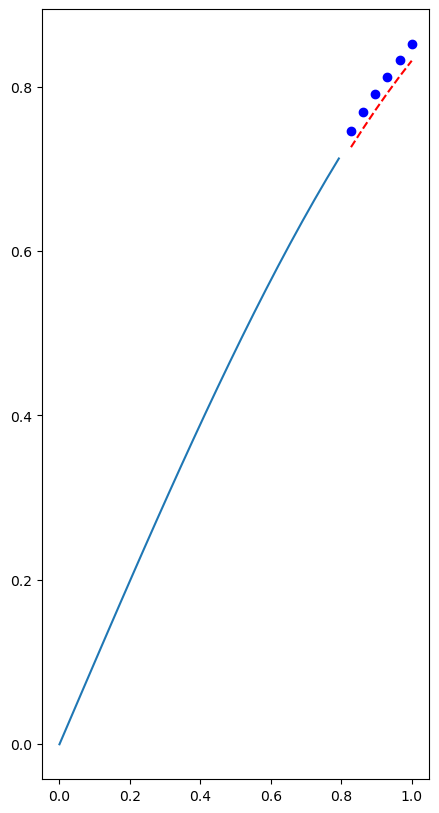

In [22]:
lGet, lPre = 24, 6
length = lGet + lPre
figure = plt.figure(figsize=(5, 10))
ax = plt.axes()
xx = np.linspace(0, 1, length)

x = np.sin(xx[:lGet])
y = np.sin(xx[lGet:])-0.01
pre = np.sin(xx[lGet:])+0.01
l1=ax.plot(xx[:lGet], x)
l2=ax.plot(xx[lGet:], y, '--r')
l3=ax.plot(xx[lGet:], pre, 'bo')
# figure.colorbar(ax)

In [4]:
# features_num = len(df.keys()) 
# figure, axis = plt.subplots(features_num, 1, 
#                         figsize=(20, features_num*5))
# # X = np.linspace(0, 1, data.shape[0])
# for i in range(features_num):
#     name = df.keys()[i]
#     vals = df[name].values
#     X = np.linspace(0, 1, len(vals))
#     axis[i].plot(X, vals)
#     axis[i].set_title(f"{ks[i]}")
# plt.show()